# **1)INTRODUCTION TO DATASET**

*we  will do the basic thing such as importing the libraries examining etc* *

In [24]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/adult-income-dataset/adult.csv


In [25]:
#adding the dataset
df = pd.read_csv('/kaggle/input/adult-income-dataset/adult.csv')


# 2)Null Data Analysis

In [26]:
#check for null values
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

**I dont have null datas in my dataset so i just wanna add a bit more**

In [27]:
# create some null values

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

In [28]:
df.head()
# first 5 rows

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802.0,11th,NaN,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,NaN,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,NaN,40.0,United-States,>50K
4,18.0,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [29]:
df.tail()
#last 5 rows

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,NaN,United-States,<=50K
48838,40.0,Private,154374.0,HS-grad,9.0,NaN,Machine-op-inspct,Husband,White,Male,0.0,NaN,40.0,NaN,>50K
48839,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K
48841,52.0,Self-emp-inc,287927.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024.0,0.0,40.0,United-States,>50K


In [30]:
df.shape
#columns and rows

(48842, 15)

In [31]:
df.columns
#just columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [32]:
df.info
#column info 

<bound method DataFrame.info of         age     workclass    fnlwgt     education  educational-num  \
0      25.0       Private  226802.0          11th              NaN   
1      38.0       Private   89814.0       HS-grad              9.0   
2      28.0     Local-gov       NaN    Assoc-acdm             12.0   
3      44.0       Private  160323.0  Some-college             10.0   
4      18.0             ?  103497.0  Some-college             10.0   
...     ...           ...       ...           ...              ...   
48837  27.0       Private  257302.0    Assoc-acdm             12.0   
48838  40.0       Private  154374.0       HS-grad              9.0   
48839  58.0       Private  151910.0       HS-grad              9.0   
48840  22.0       Private  201490.0       HS-grad              9.0   
48841  52.0  Self-emp-inc  287927.0       HS-grad              9.0   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own

**as you can see we have some ? and NaN values**

In [33]:
df.dtypes
#data types of columns

age                float64
workclass           object
fnlwgt             float64
education           object
educational-num    float64
marital-status      object
occupation          object
relationship        object
race                object
gender              object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

**6 float 9 object column**

In [34]:
#Exercise =List comprehension
categorical_features = [col for col in df.columns if (df[col].dtype == "object") or (df[col].dtype == "categorical")]
numerical_features = [col for col in df.columns if (df[col].dtype != "object") and (df[col].dtype != "categorical")]


In [35]:
#we will split data to two for better analysis
categorical_features, numerical_features

(['workclass',
  'education',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'gender',
  'native-country',
  'income'],
 ['age',
  'fnlwgt',
  'educational-num',
  'capital-gain',
  'capital-loss',
  'hours-per-week'])

****our categorical columns can be encoded to numerical columns.****

In [36]:
# Replace '?' with empty strings.
df = df.replace('?', '')

# Convert empty strings to NaN 
df = df.replace('Nan', '')

In [37]:
#we convert the categorical types to Categorical type
for col in df.columns:
    if col in categorical_features:
        df[col] = pd.Categorical(df[col])

In [38]:
df.info()
#info of the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              47425 non-null  float64 
 1   workclass        47372 non-null  category
 2   fnlwgt           47358 non-null  float64 
 3   education        47445 non-null  category
 4   educational-num  47440 non-null  float64 
 5   marital-status   47416 non-null  category
 6   occupation       47316 non-null  category
 7   relationship     47426 non-null  category
 8   race             47438 non-null  category
 9   gender           47372 non-null  category
 10  capital-gain     47395 non-null  float64 
 11  capital-loss     47441 non-null  float64 
 12  hours-per-week   47294 non-null  float64 
 13  native-country   47408 non-null  category
 14  income           47434 non-null  category
dtypes: category(9), float64(6)
memory usage: 2.7 MB


In [39]:
df.describe()



,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,47425.000000,4.735800e+04,47440.000000,47395.000000,47441.000000,47294.000000
mean,38.646769,1.896457e+05,10.077340,1078.236122,87.564807,40.424007
std,13.704258,1.053644e+05,2.571588,7454.094701,403.079707,12.397381
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782550e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376230e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [40]:
df.isnull().sum()
#check the empty parts column by column

age                1417
workclass          1470
fnlwgt             1484
education          1397
educational-num    1402
marital-status     1426
occupation         1526
relationship       1416
race               1404
gender             1470
capital-gain       1447
capital-loss       1401
hours-per-week     1548
native-country     1434
income             1408
dtype: int64

In [41]:
df.isnull().sum().sum()
#total empty parts

21650

In [42]:
df.notnull().sum()
#not empty parts

age                47425
workclass          47372
fnlwgt             47358
education          47445
educational-num    47440
marital-status     47416
occupation         47316
relationship       47426
race               47438
gender             47372
capital-gain       47395
capital-loss       47441
hours-per-week     47294
native-country     47408
income             47434
dtype: int64

In [43]:
# Veri setinde toplam kaç adet eksik gözlem var, kaç adet eksik olmayan gözlem var görelim.
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 710980 adet eksik olmayan, 21650 eksik gözlem var.


In [44]:
!pip install missingno
#installed this for better plots

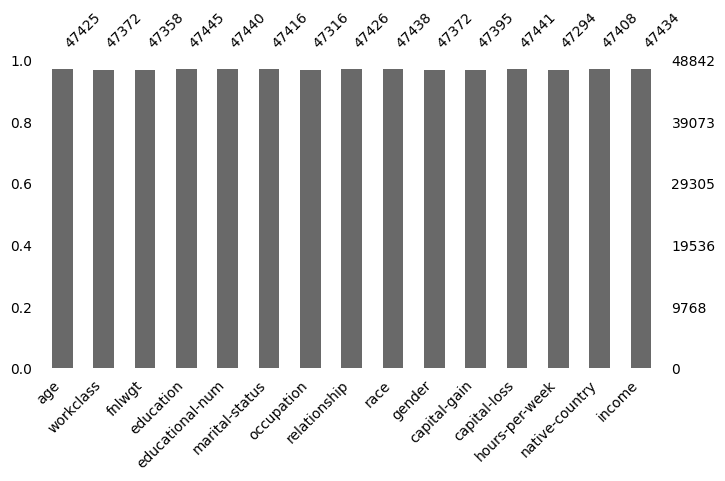

In [45]:
import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

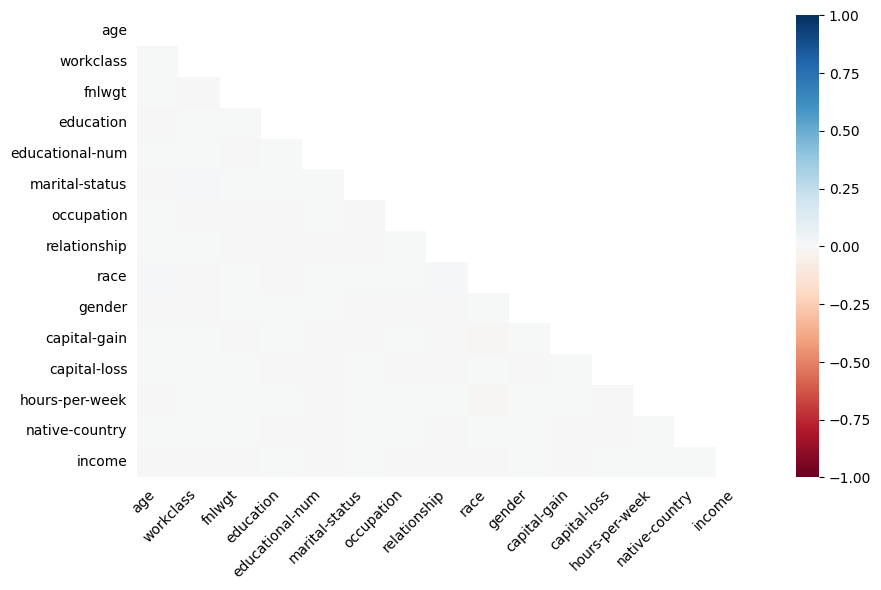

In [46]:
# Nullity Correlation (Heatmap)
# 1'e ne kadar yakınsa, ilişki ihtimali o kadar yüksek.
# 0 ise, birbirlerini etkileyen bir durum yoktur.
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

eksik değerler yüzde onun altındaysa sileceğim yoksa knn imputer ile dolduracağım.

In [47]:
#missing value percentage calculation
missing_values = df.isnull().sum()
total_values = df.shape[0]
missing_percentage = (missing_values / total_values) * 100

# Verileri birleştir
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Eksik değerlere göre sıralama yap
missing_summary = missing_summary.sort_values(by='Percentage', ascending=False)

missing_summary

,Missing Values,Percentage
hours-per-week,1548,3.169403
occupation,1526,3.124360
fnlwgt,1484,3.038369
workclass,1470,3.009705
gender,1470,3.009705
capital-gain,1447,2.962614
native-country,1434,2.935998
marital-status,1426,2.919618
age,1417,2.901192
relationship,1416,2.899144


yüzde 2 ve yüzde 8 arasında değişen bu boş verileri silmeye karar verdim.Eğer ml modelinde düşük bir sonuç alırsam geri dönüp içini doldurucam

In [48]:
# Eksik verisi olan satırları sil
df_cleaned = df.dropna()  # .dropna() fonksiyonu eksik veri içeren satırları siler

In [49]:
# 2. Verinin temizlenmesinden sonra eksik veri kontrolü yap
missing_values_after = df_cleaned.isnull().sum()
missing_percentage_after = (missing_values_after / df_cleaned.shape[0]) * 100

missing_summary_after = pd.DataFrame({
    'Missing Values': missing_values_after,
    'Percentage': missing_percentage_after
})

missing_summary_after = missing_summary_after.sort_values(by='Percentage', ascending=False)

missing_summary_after

,Missing Values,Percentage
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
educational-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
gender,0,0.0


In [50]:
# Sonuçları yazdır
print("Eksik Veri Öncesi Durum:")
print(missing_summary)
print("\nEksik Veri Sonrası Durum:")
print(missing_summary_after)

Eksik Veri Öncesi Durum:
                 Missing Values  Percentage
hours-per-week             1548    3.169403
occupation                 1526    3.124360
fnlwgt                     1484    3.038369
workclass                  1470    3.009705
gender                     1470    3.009705
capital-gain               1447    2.962614
native-country             1434    2.935998
marital-status             1426    2.919618
age                        1417    2.901192
relationship               1416    2.899144
income                     1408    2.882765
race                       1404    2.874575
educational-num            1402    2.870480
capital-loss               1401    2.868433
education                  1397    2.860243

Eksik Veri Sonrası Durum:
                 Missing Values  Percentage
age                           0         0.0
workclass                     0         0.0
fnlwgt                        0         0.0
education                     0         0.0
educational-num         

# 3)Categorical Datatype Analysis

In [51]:
# 1. Kategorik değişkenleri tespit et
categorical_features = df.select_dtypes(include=['object', 'category']).columns

categorical_features

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [52]:
# Kategorik bir değişkendeki benzersiz değerleri gözlemlemek için unique() kullan.
unique_work=df['workclass'].unique().tolist()
print(unique_work)

['Private', 'Local-gov', '', 'Self-emp-not-inc', 'Federal-gov', 'State-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked']


In [53]:
unique_ed=df['education'].unique().tolist()
print(unique_ed)

['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', nan, 'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate', '5th-6th', '10th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool']


In [54]:
unique_marital=df['marital-status'].unique().tolist()
print(unique_marital)

['Never-married', 'Married-civ-spouse', nan, 'Widowed', 'Divorced', 'Separated', 'Married-spouse-absent', 'Married-AF-spouse']


In [55]:
unique_oc=df['occupation'].unique().tolist()
print(unique_oc)

['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '', 'Other-service', nan, 'Prof-specialty', 'Craft-repair', 'Adm-clerical', 'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv', 'Transport-moving', 'Handlers-cleaners', 'Armed-Forces']


In [56]:
unique_re=df['relationship'].unique().tolist()
print(unique_re)

['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife', nan, 'Other-relative']


In [57]:
unique_ra=df['race'].unique().tolist()
print(unique_ra)

['Black', 'White', 'Asian-Pac-Islander', nan, 'Other', 'Amer-Indian-Eskimo']


In [58]:
unique_ge=df['gender'].unique().tolist()
print(unique_ge)

['Male', 'Female', nan]


In [59]:
unique_nat=df['native-country'].unique().tolist()
print(unique_nat)

['United-States', nan, '', 'Peru', 'Guatemala', 'Mexico', 'Dominican-Republic', 'Ireland', 'Germany', 'Philippines', 'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam', 'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland', 'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal', 'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica', 'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece', 'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France', 'Holand-Netherlands']


In [60]:
unique_in=df['income'].unique().tolist()
print(unique_in)

['<=50K', '>50K', nan]


In [61]:
# Her bir kategorik değişken için toplam gözlem sayısını value_counts() ile bul.
for col in categorical_features:
    print(f'{df[col].value_counts()}\n', 5*"*********")

workclass
Private             32878
Self-emp-not-inc     3745
Local-gov            3055
                     2722
State-gov            1914
Self-emp-inc         1638
Federal-gov          1389
Without-pay            21
Never-worked           10
Name: count, dtype: int64
 *********************************************
education
HS-grad         15341
Some-college    10570
Bachelors        7779
Masters          2591
Assoc-voc        2003
11th             1755
Assoc-acdm       1549
10th             1352
7th-8th           930
Prof-school       807
9th               737
12th              641
Doctorate         576
5th-6th           493
1st-4th           239
Preschool          82
Name: count, dtype: int64
 *********************************************
marital-status
Married-civ-spouse       21716
Never-married            15634
Divorced                  6458
Separated                 1483
Widowed                   1482
Married-spouse-absent      606
Married-AF-spouse           37
Name: count, dty

In [62]:
# 2. Her kategorik değişkenin frekans dağılımını yazdır
for col in categorical_features:
    print(f"Frekans Dağılımı - {col}:")
    print(df[col].value_counts())
    print("-" * 30)

Frekans Dağılımı - workclass:
workclass
Private             32878
Self-emp-not-inc     3745
Local-gov            3055
                     2722
State-gov            1914
Self-emp-inc         1638
Federal-gov          1389
Without-pay            21
Never-worked           10
Name: count, dtype: int64
------------------------------
Frekans Dağılımı - education:
education
HS-grad         15341
Some-college    10570
Bachelors        7779
Masters          2591
Assoc-voc        2003
11th             1755
Assoc-acdm       1549
10th             1352
7th-8th           930
Prof-school       807
9th               737
12th              641
Doctorate         576
5th-6th           493
1st-4th           239
Preschool          82
Name: count, dtype: int64
------------------------------
Frekans Dağılımı - marital-status:
marital-status
Married-civ-spouse       21716
Never-married            15634
Divorced                  6458
Separated                 1483
Widowed                   1482
Married-spouse-

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


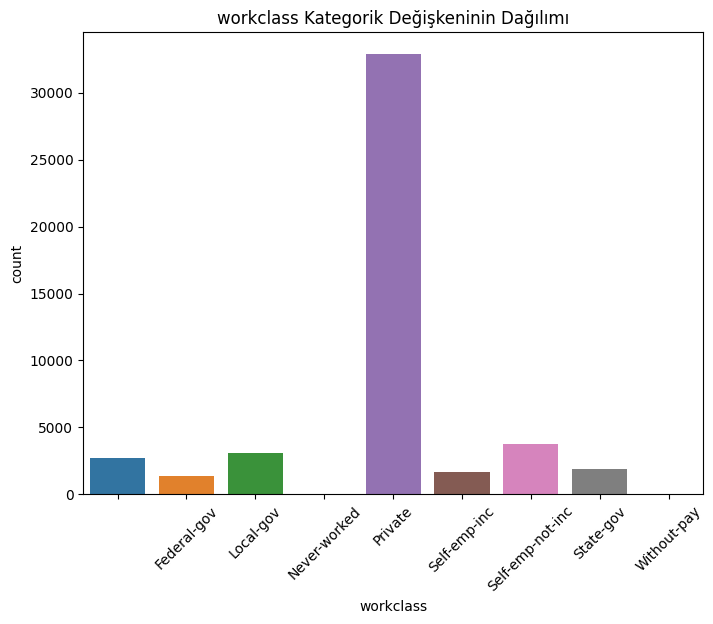

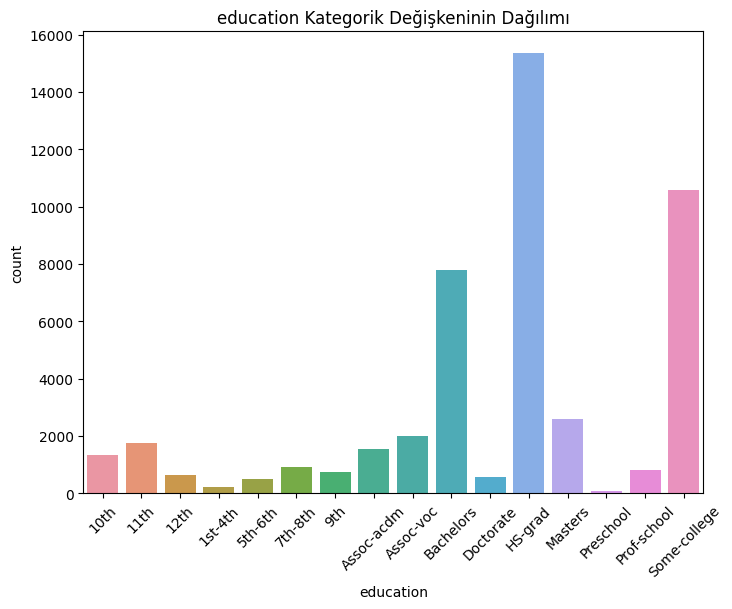

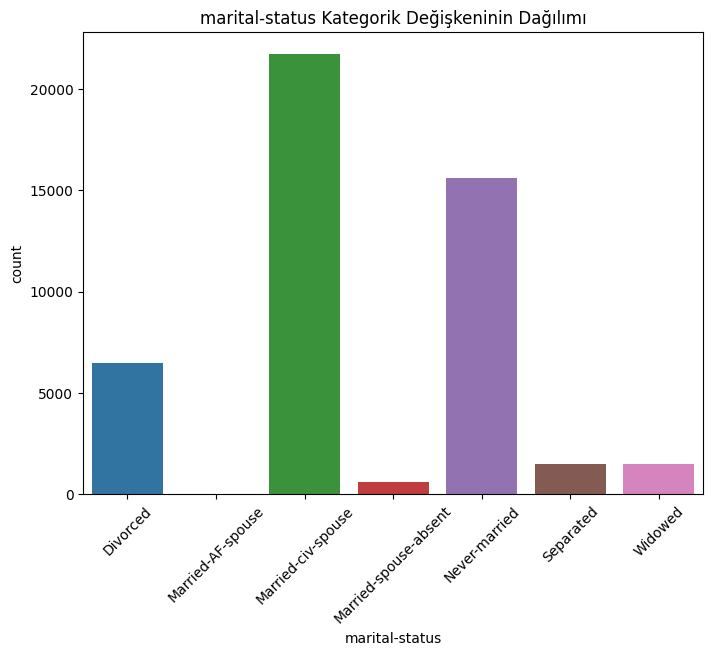

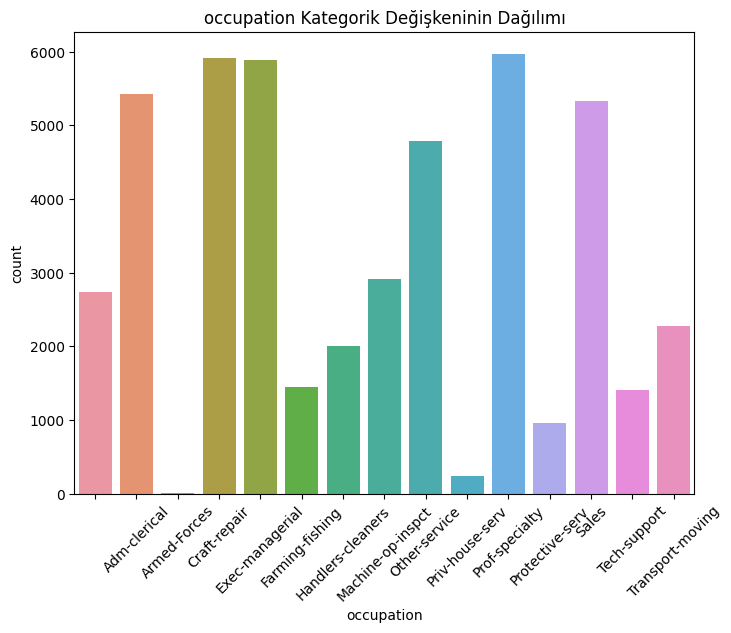

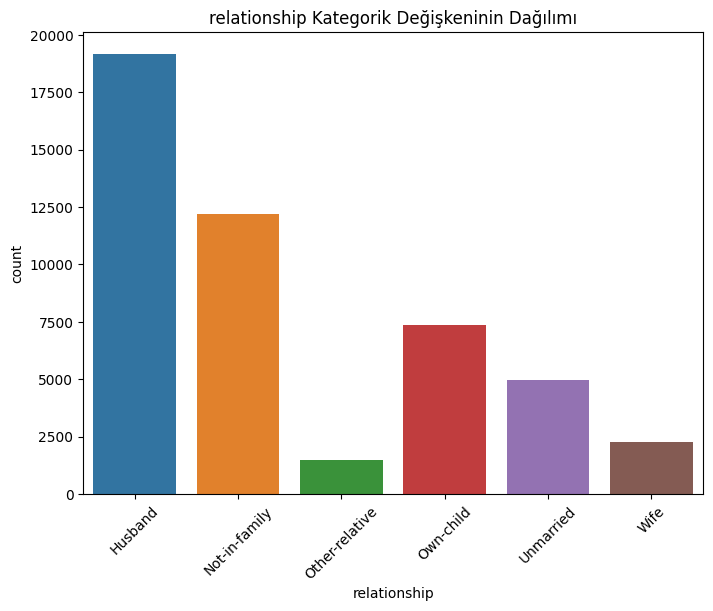

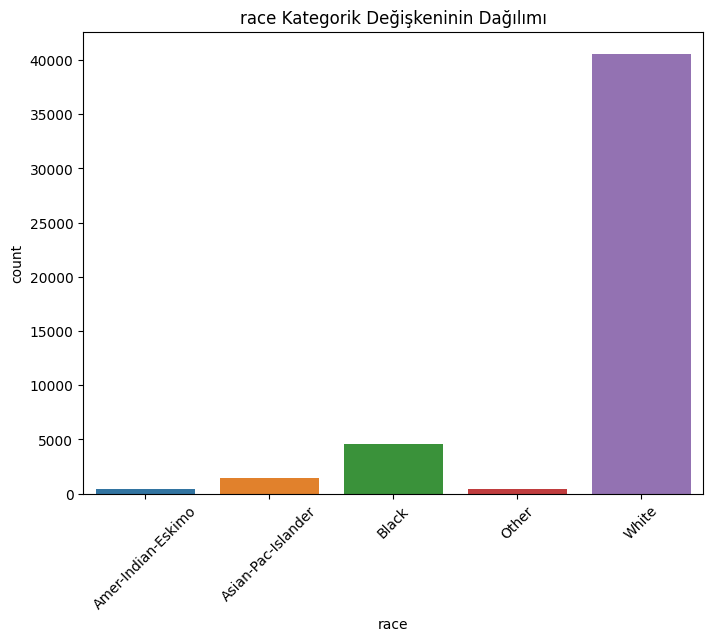

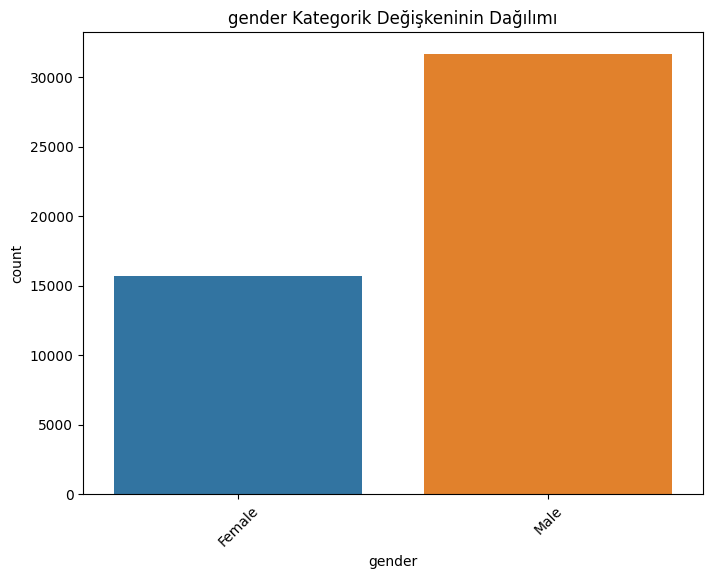

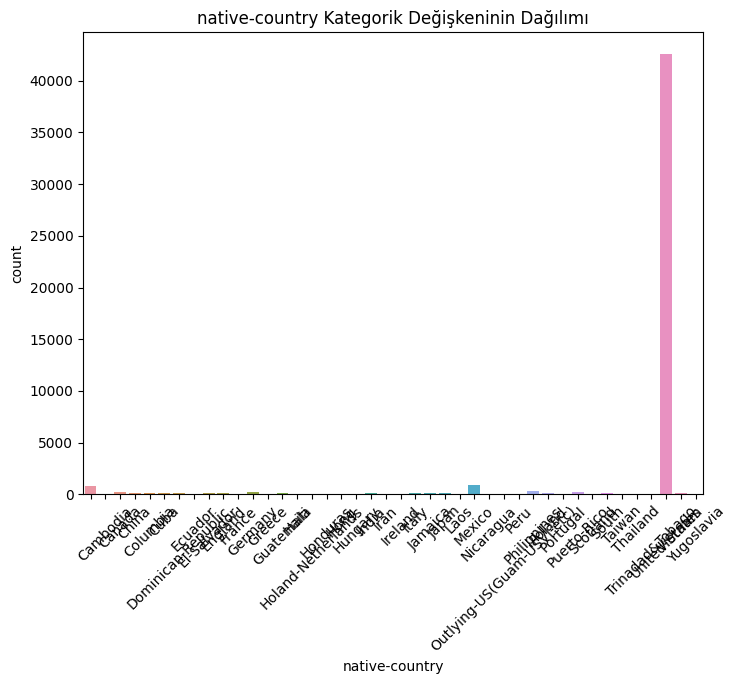

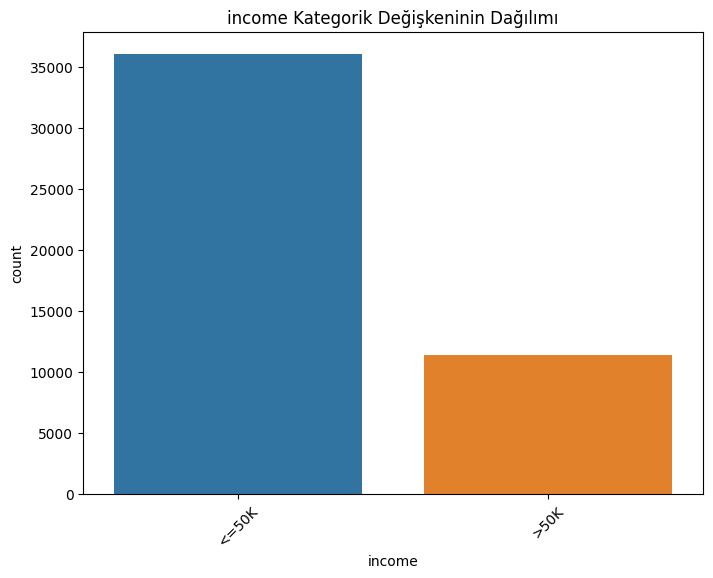

In [63]:
# 3. Kategorik değişkenlerin bar grafiğini çiz
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Kategorik Değişkeninin Dağılımı")
    plt.xticks(rotation=45)  # X eksenindeki etiketlerin daha rahat okunması için
    plt.show()

In [64]:
# Liste haline getirilecek değişkenlerin belirlenmesi
columns_to_listify = ['workclass', 'education', 'occupation', 'race', 'gender', 'native-country', 'income']

# Her sütun için kategorik değerleri listeye çevirme
categories_dict = {col: df[col].dropna().unique().tolist() for col in columns_to_listify}

# Sonuçları kontrol etme
for col, values in categories_dict.items():
    print(f"{col} kategorileri: {values}\n")


workclass kategorileri: ['Private', 'Local-gov', '', 'Self-emp-not-inc', 'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked']

education kategorileri: ['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', 'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate', '5th-6th', '10th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool']

occupation kategorileri: ['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '', 'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical', 'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv', 'Transport-moving', 'Handlers-cleaners', 'Armed-Forces']

race kategorileri: ['Black', 'White', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo']

gender kategorileri: ['Male', 'Female']

native-country kategorileri: ['United-States', '', 'Peru', 'Guatemala', 'Mexico', 'Dominican-Republic', 'Ireland', 'Germany', 'Philippines', 'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam', 'South', 'Columbia', 'Japan',

In [65]:
from pandas.api.types import CategoricalDtype

# Sıralama mantığını tanımlıyoruz
education_order = [
    "Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th",
    "HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm", "Bachelors", "Masters", "Doctorate", "Prof-school"
]

workclass_order = [
    "Never-worked", "Without-pay", "Federal-gov", "Local-gov", "State-gov", 
    "Self-emp-not-inc", "Self-emp-inc", "Private"
]

marital_status_order = [
    "Never-married", "Separated", "Divorced", "Widowed", "Married-spouse-absent",
    "Married-AF-spouse", "Married-civ-spouse"
]

relationship_order = [
    "Other-relative", "Not-in-family", "Own-child", "Unmarried", "Wife", "Husband"
]

race_order = ["Other", "Amer-Indian-Eskimo", "Asian-Pac-Islander", "Black", "White"]

gender_order = ["Female", "Male"]

income_order = ["<=50K", ">50K"]


label encoding için hazırlar feature engineering kısmında yapıcam

In [66]:
# Değişkenleri ordinal hale getiriyoruz
df["education"] = df["education"].astype(CategoricalDtype(categories=education_order, ordered=True))
df["workclass"] = df["workclass"].astype(CategoricalDtype(categories=workclass_order, ordered=True))
df["marital-status"] = df["marital-status"].astype(CategoricalDtype(categories=marital_status_order, ordered=True))
df["relationship"] = df["relationship"].astype(CategoricalDtype(categories=relationship_order, ordered=True))
df["race"] = df["race"].astype(CategoricalDtype(categories=race_order, ordered=True))
df["gender"] = df["gender"].astype(CategoricalDtype(categories=gender_order, ordered=True))
df["income"] = df["income"].astype(CategoricalDtype(categories=income_order, ordered=True))


In [67]:
# Eğitim seviyesini kontrol et
print(df["education"].head())
print(df["education"].cat.categories)


0            11th
1         HS-grad
2      Assoc-acdm
3    Some-college
4    Some-college
Name: education, dtype: category
Categories (16, object): ['Preschool' < '1st-4th' < '5th-6th' < '7th-8th' ... 'Bachelors' < 'Masters' < 'Doctorate' < 'Prof-school']
Index(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th',
       '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm',
       'Bachelors', 'Masters', 'Doctorate', 'Prof-school'],
      dtype='object')


# 4)Numerical Datatype Analysis

In [68]:
# Veri setindeki numerik kolonları seçmek için aşağıdaki yapıyı kullanabiliriz.
df_numerical = df.select_dtypes(include = ["float64", "int64"])
df_numerical.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25.0,226802.0,NaN,0.0,0.0,40.0
1,38.0,89814.0,9.0,0.0,0.0,50.0
2,28.0,NaN,12.0,0.0,0.0,40.0
3,44.0,160323.0,10.0,7688.0,NaN,40.0
4,18.0,103497.0,10.0,0.0,0.0,30.0


In [69]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
age,47425.0,38.646769,13.704258,17.0,28.0,37.0,48.0,90.0
fnlwgt,47358.0,189645.705562,105364.443567,12285.0,117555.0,178255.0,237623.0,1490400.0
educational-num,47440.0,10.077340,2.571588,1.0,9.0,10.0,12.0,16.0
capital-gain,47395.0,1078.236122,7454.094701,0.0,0.0,0.0,0.0,99999.0
capital-loss,47441.0,87.564807,403.079707,0.0,0.0,0.0,0.0,4356.0
hours-per-week,47294.0,40.424007,12.397381,1.0,40.0,40.0,45.0,99.0


In [70]:
def give_stats(dataframe: pd.DataFrame) -> None:
    """Prints statistical information for numerical columns.

    Args:
        dataframe (pd.DataFrame): DataFrame object.
    
    Return:
        None
    
    """

    num_df = dataframe.select_dtypes(include = ["float", "int"])

    for col in num_df.columns:
        print(f"**********{col}**********")
        print(f"Mean value of {col} is {num_df[col].mean():.2f}")
        print(f"Std value of {col} is {num_df[col].std():.2f}")
        print(f"Max value of {col} is {num_df[col].max()}")
        print(f"Min value of {col} is {num_df[col].min()}")
        print(f"Count value of {col} is {num_df[col].count()}")
        print(f"Median value of {col} is {num_df[col].median()}\n")

In [71]:
give_stats(dataframe = df)

**********age**********
Mean value of age is 38.65
Std value of age is 13.70
Max value of age is 90.0
Min value of age is 17.0
Count value of age is 47425
Median value of age is 37.0

**********fnlwgt**********
Mean value of fnlwgt is 189645.71
Std value of fnlwgt is 105364.44
Max value of fnlwgt is 1490400.0
Min value of fnlwgt is 12285.0
Count value of fnlwgt is 47358
Median value of fnlwgt is 178255.0

**********educational-num**********
Mean value of educational-num is 10.08
Std value of educational-num is 2.57
Max value of educational-num is 16.0
Min value of educational-num is 1.0
Count value of educational-num is 47440
Median value of educational-num is 10.0

**********capital-gain**********
Mean value of capital-gain is 1078.24
Std value of capital-gain is 7454.09
Max value of capital-gain is 99999.0
Min value of capital-gain is 0.0
Count value of capital-gain is 47395
Median value of capital-gain is 0.0

**********capital-loss**********
Mean value of capital-loss is 87.56
Std 

In [72]:
df_numerical

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25.0,226802.0,NaN,0.0,0.0,40.0
1,38.0,89814.0,9.0,0.0,0.0,50.0
2,28.0,NaN,12.0,0.0,0.0,40.0
3,44.0,160323.0,10.0,7688.0,NaN,40.0
4,18.0,103497.0,10.0,0.0,0.0,30.0
...,...,...,...,...,...,...
48837,27.0,257302.0,12.0,0.0,0.0,NaN
48838,40.0,154374.0,9.0,0.0,NaN,40.0
48839,58.0,151910.0,9.0,0.0,0.0,40.0
48840,22.0,201490.0,9.0,0.0,0.0,20.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

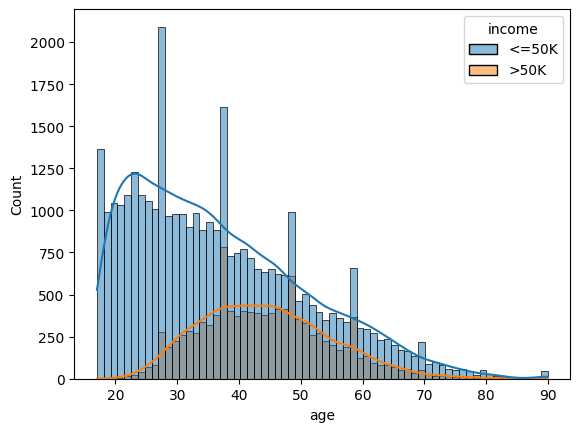

In [73]:
# Numerik bir kolonun dağılımını görmek için histogram kullanırız.
sns.histplot(data = df, x = "age", kde = True, hue = "income");

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

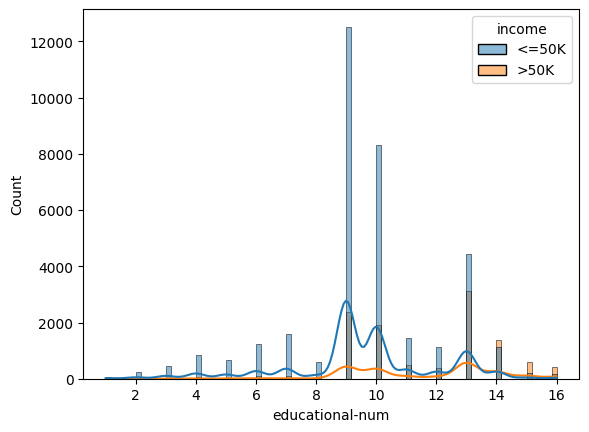

In [74]:
sns.histplot(data = df, x = "educational-num", kde = True, hue = "income");

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

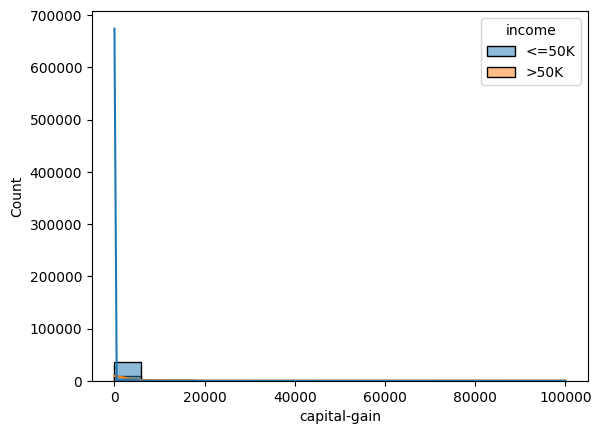

In [75]:
sns.histplot(data = df, x = "capital-gain", kde = True,hue = "income");

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

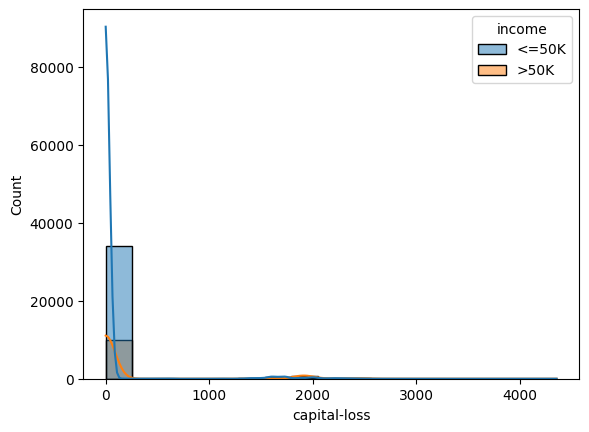

In [76]:
sns.histplot(data = df, x = "capital-loss", kde = True, hue = "income");

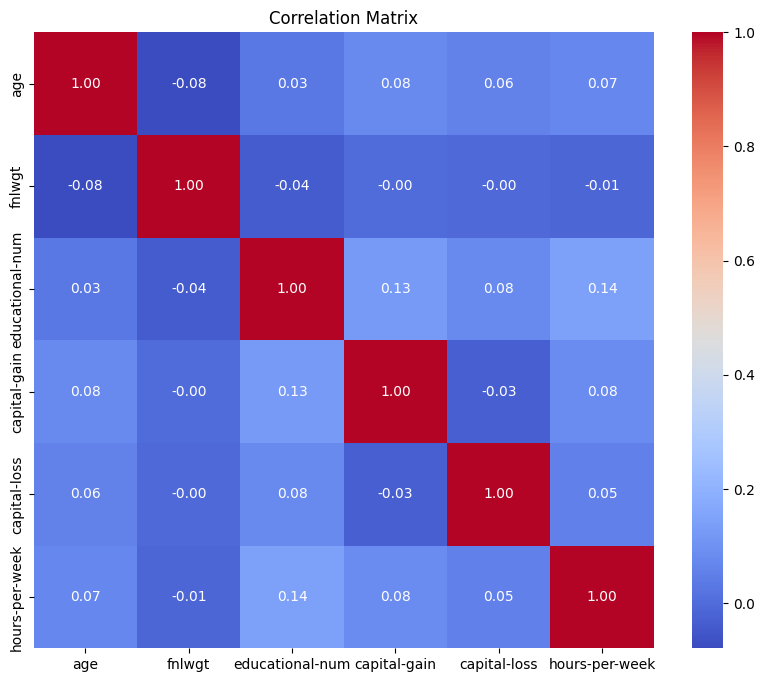

In [77]:
# Compute the correlation matrix for numerical columns
correlation_matrix = df_numerical.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 5)Outlier Analysis

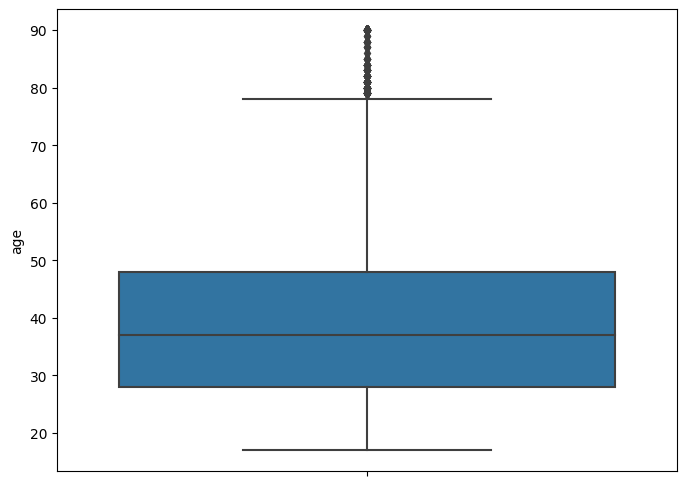

In [78]:
df = df.copy()
# Bir değişkendeki IQR'a göre aykırı gözlemleri boxplot kullanarak görselleştirelim.
plt.figure(figsize = (8, 6))
sns.boxplot(data = df,
            y = df["age"],
            orient = "v");

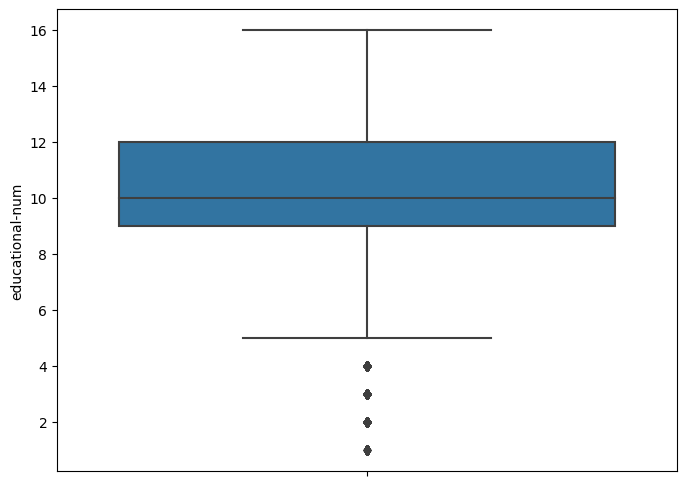

In [79]:
df = df.copy()
# Bir değişkendeki IQR'a göre aykırı gözlemleri boxplot kullanarak görselleştirelim.
plt.figure(figsize = (8, 6))
sns.boxplot(data = df,
            y = df["educational-num"],
            orient = "v");

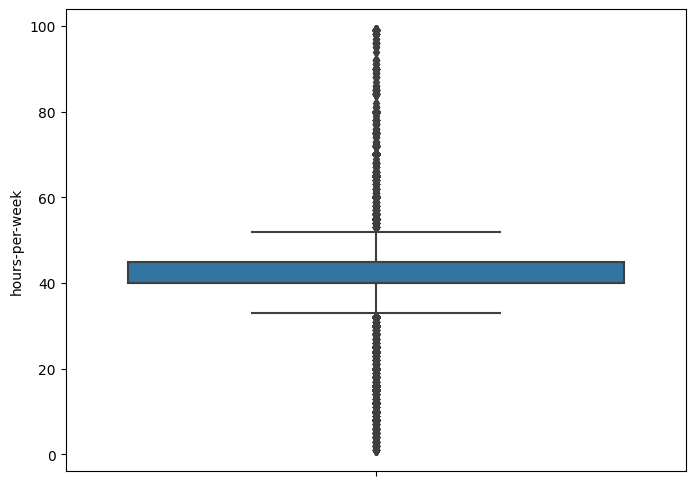

In [80]:
df = df.copy()
# Bir değişkendeki IQR'a göre aykırı gözlemleri boxplot kullanarak görselleştirelim.
plt.figure(figsize = (8, 6))
sns.boxplot(data = df,
            y = df["hours-per-week"],
            orient = "v");

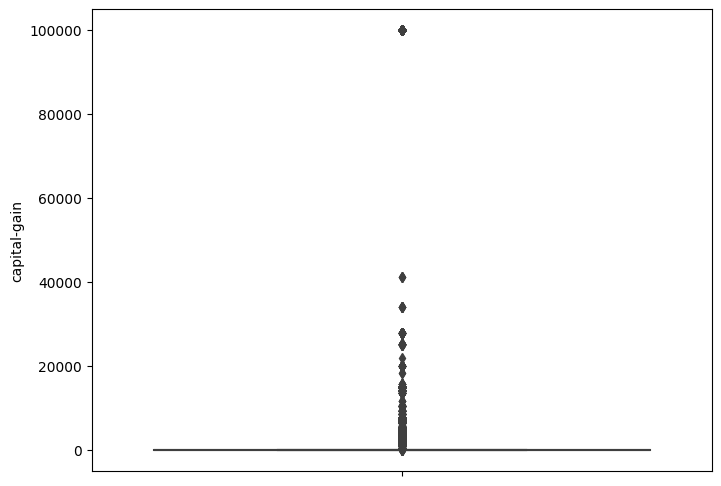

In [81]:
df = df.copy()
# Bir değişkendeki IQR'a göre aykırı gözlemleri boxplot kullanarak görselleştirelim.
plt.figure(figsize = (8, 6))
sns.boxplot(data = df,
            y = df["capital-gain"],
            orient = "v");

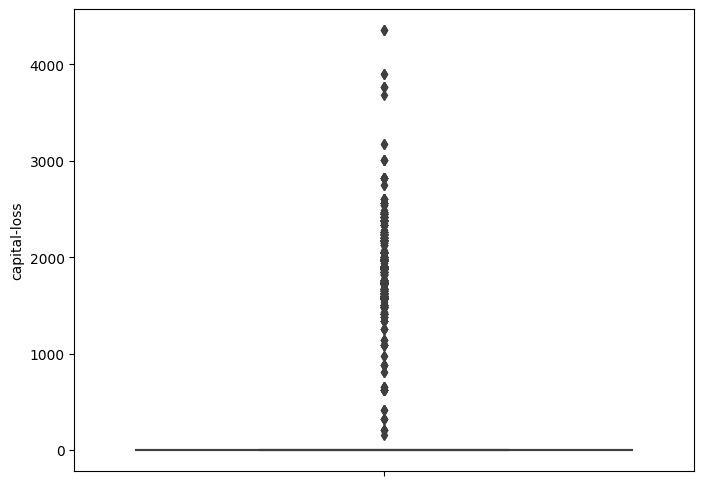

In [82]:
df = df.copy()
# Bir değişkendeki IQR'a göre aykırı gözlemleri boxplot kullanarak görselleştirelim.
plt.figure(figsize = (8, 6))
sns.boxplot(data = df,
            y = df["capital-loss"],
            orient = "v");

age  için outlier arayacağım.

In [83]:
df_age = df['age']
# Quantile değerlerin belirlenmesi.
Q1 = df_age.quantile(0.25)
Q3 = df_age.quantile(0.75)

print(Q1)
print(Q3)

# IQR değerin belirlenmesi.
IQR = Q3-Q1
print(IQR)

# Alt ve üst sınırların belirlenmesi.
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

28.0
48.0
20.0


In [84]:
# Upper_fence üzerinde kalan aykırı gözlemlerin index değerlerini, daha sonra kullanmak üzere bir değişkende tutabiliriz.
outlier_idx = df_age[df_age > upper_fence].index

outlier_idx

Index([  193,   234,   899,   926,   951,  1079,  1398,  1834,  2085,  2290,
       ...
       47713, 47977, 48095, 48117, 48136, 48558, 48648, 48740, 48775, 48806],
      dtype='int64', length=209)

In [85]:
df_del = df[~(df_age > upper_fence)]

df_del

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802.0,11th,NaN,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,NaN,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,NaN,40.0,United-States,>50K
4,18.0,NaN,103497.0,Some-college,10.0,Never-married,,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,NaN,United-States,<=50K
48838,40.0,Private,154374.0,HS-grad,9.0,NaN,Machine-op-inspct,Husband,White,Male,0.0,NaN,40.0,NaN,>50K
48839,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


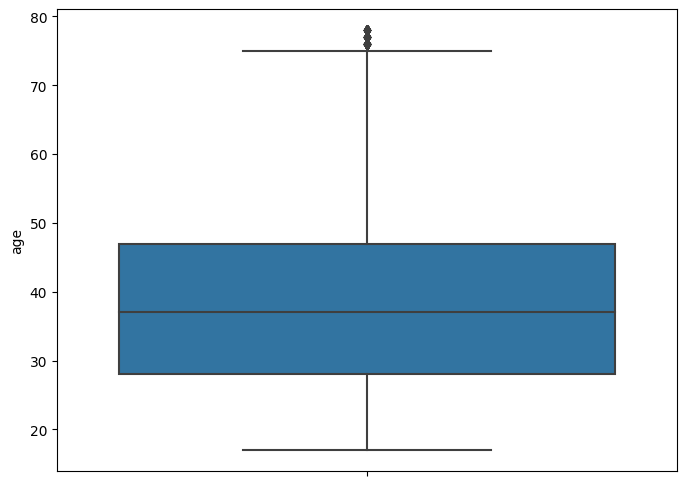

In [86]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df_del["age"],
            orient = "v");

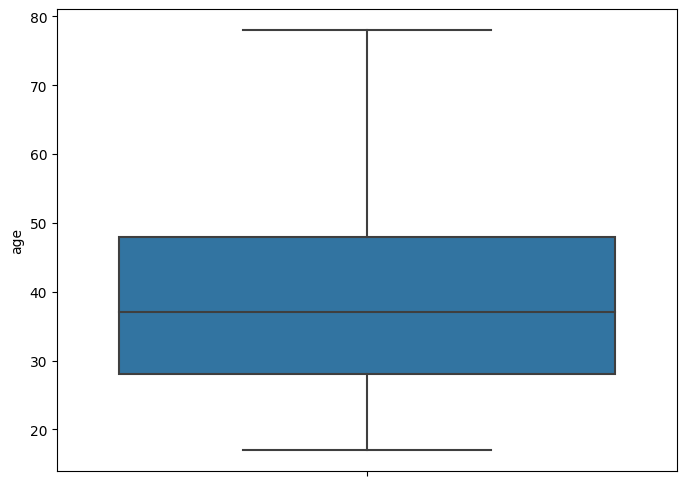

In [87]:
df = df.copy()
df.loc[df_age > upper_fence, "age"] = upper_fence
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df["age"],
            orient = "v");

# 6)Feature Engineering

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


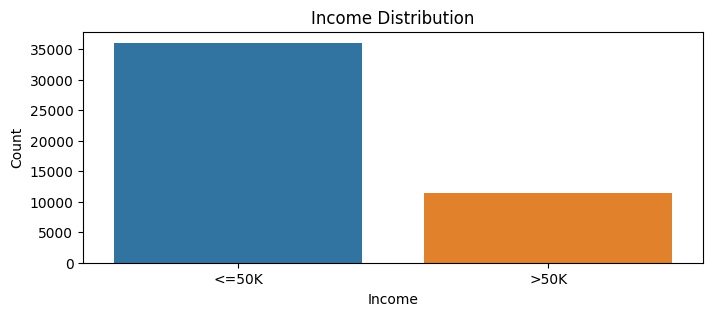

In [88]:
# Plot income distribution
plt.figure(figsize=(8, 3))
sns.countplot(x='income', data=df)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

In [89]:
# Add 'age_slab' column
#use it for feature engineering part
def categorize_age(age):
    if age <= 18:
        return '0-18'
    elif 19 <= age <= 30:
        return '19-30'
    elif 31 <= age <= 50:
        return '30-50'
    elif 51 <= age <= 65:
        return '50-65'
    else:
        return '65+'

df['age_slab'] = df['age'].apply(categorize_age)

<Figure size 1000x600 with 0 Axes>

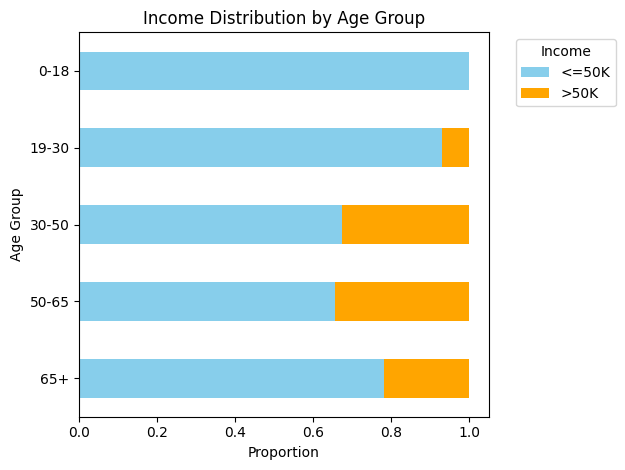

In [90]:
# Age Vs Income
income_distribution = df.groupby('age_slab')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
income_distribution.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.xlabel('Proportion')
plt.ylabel('Age Group')
plt.title('Income Distribution by Age Group')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_30/3141109995.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_distribution = df.groupby('workclass')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)


<Figure size 1000x600 with 0 Axes>

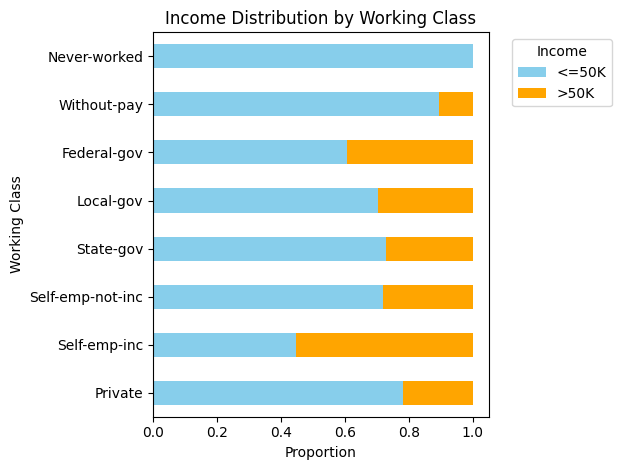

In [91]:
#Income Distribution by Working Class
income_distribution = df.groupby('workclass')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
income_distribution.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.xlabel('Proportion')
plt.ylabel('Working Class')
plt.title('Income Distribution by Working Class')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [92]:
# Encode Working Class
workclass_mapping = {
    'Federal-gov': 0,
    'Local-gov': 1,
    'Private': 2,
    'Self-emp-inc': 3,
    'Self-emp-not-inc': 4,
    'State-gov': 5,
    'Without-pay': 6
}

df['workclass_encoded'] = df['workclass'].map(workclass_mapping)

/tmp/ipykernel_30/2491643318.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_distribution = df.groupby('education')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)


<Figure size 1000x600 with 0 Axes>

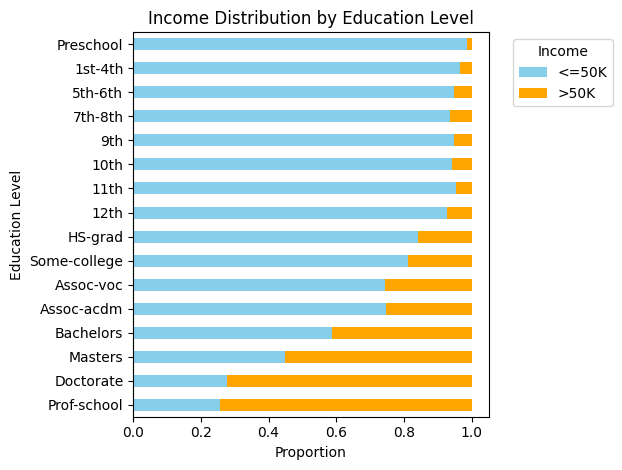

In [93]:
# Plot Income Distribution by Education level
income_distribution = df.groupby('education')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
income_distribution.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.xlabel('Proportion')
plt.ylabel('Education Level')
plt.title('Income Distribution by Education Level')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [94]:
# Encode education
education_mapping = {
    'HS-grad': 0,
    'Some-college': 1,
    'Bachelors': 2,
    'Masters': 3,
    'Assoc-voc': 4,
    '11th': 5,
    '10th': 6,
    '7th-8th': 7,
    'Prof-school': 8,
    '9th': 9,
    '12th': 10,
    'Doctorate': 11,
    '5th-6th': 12,
    '1st-4th': 13,
    'Preschool': 14
   }

df['education_encoded'] = df['education'].map(education_mapping)

/tmp/ipykernel_30/1513811192.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_distribution = df.groupby('marital-status')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)


<Figure size 1000x600 with 0 Axes>

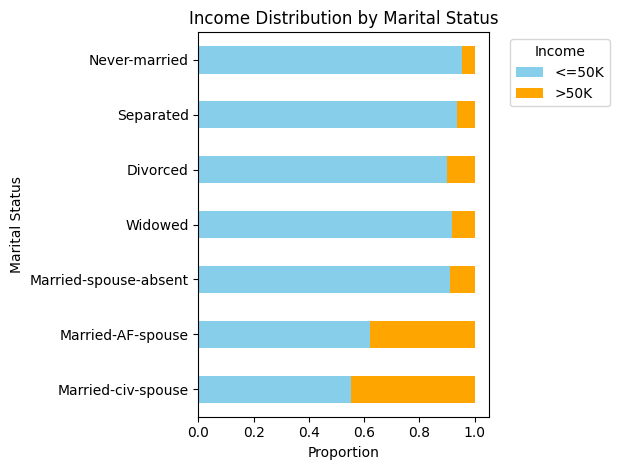

In [95]:
# marital-status Vs income
income_distribution = df.groupby('marital-status')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
income_distribution.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.xlabel('Proportion')
plt.ylabel('Marital Status')
plt.title('Income Distribution by Marital Status')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [96]:

# Encode marital-status
marital_mapping = {
    'Divorced': 0,
    'Married-civ-spouse': 1,
    'Never-married': 2,
    'Separated': 3,
    'Widowed': 4,
    'Married-spouse-absent': 5,
    'Married-AF-spouse': 6
   }

df['marital_encoded'] = df['marital-status'].map(marital_mapping)

/tmp/ipykernel_30/1578350931.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_distribution = df.groupby('occupation')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)


<Figure size 1000x600 with 0 Axes>

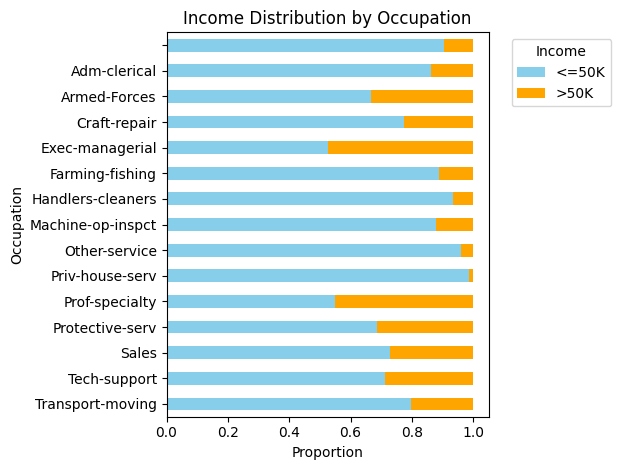

In [97]:
# occupation Vs income
income_distribution = df.groupby('occupation')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
income_distribution.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.xlabel('Proportion')
plt.ylabel('Occupation')
plt.title('Income Distribution by Occupation')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [98]:
# Encode occupation
occupation_mapping = {
    'Craft-repair': 0,
    'Prof-specialty': 1,
    'Exec-managerial': 2,
    'Adm-clerical': 3,
    'Sales': 4,
    'Other-service': 5,
    'Machine-op-inspct': 6,
    'Transport-moving': 7,
    'Handlers-cleaners': 8,
    'Farming-fishing': 9,
    'Tech-support': 10,
    'Doctorate': 11,
    'Protective-serv': 12,
    'Priv-house-serv': 13,
    'Armed-Forces': 14
   }

df['occupation_encoded'] = df['occupation'].map(occupation_mapping)

/tmp/ipykernel_30/1180268888.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_distribution = df.groupby('race')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)


<Figure size 1000x600 with 0 Axes>

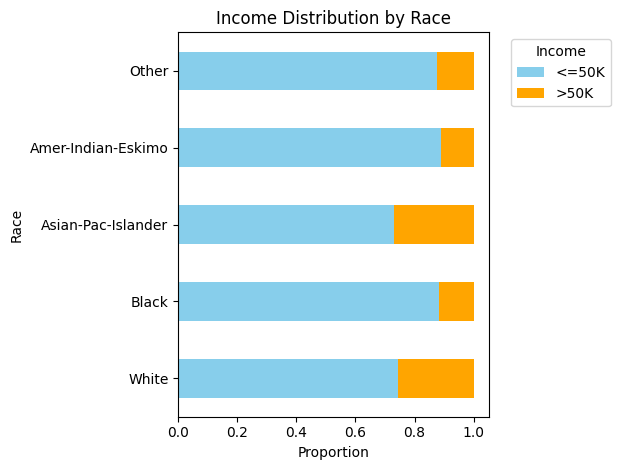

In [99]:
# race Vs income
income_distribution = df.groupby('race')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
income_distribution.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.xlabel('Proportion')
plt.ylabel('Race')
plt.title('Income Distribution by Race')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [100]:
# Encode race
race_mapping = {
    'White': 0,
    'Black': 1,
    'Asian-Pac-Islander': 2,
    'Amer-Indian-Eskimo': 3,
    'Other': 4
   }

df['race_encoded'] = df['race'].map(race_mapping)

/tmp/ipykernel_30/4158993867.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_distribution = df.groupby('gender')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)


<Figure size 800x500 with 0 Axes>

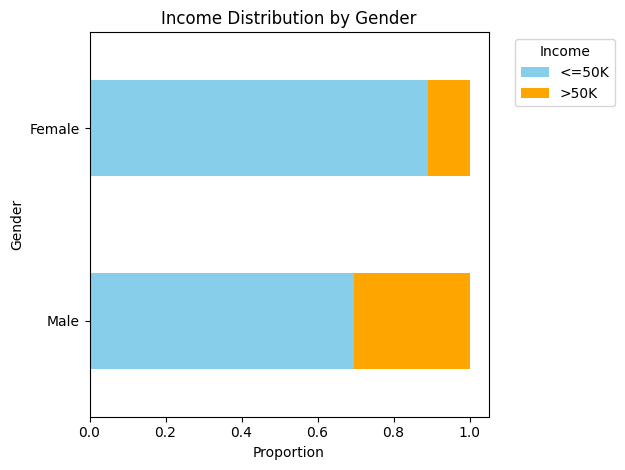

In [101]:
# gender Vs income
income_distribution = df.groupby('gender')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(8, 5))
income_distribution.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.xlabel('Proportion')
plt.ylabel('Gender')
plt.title('Income Distribution by Gender')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [102]:
# Encode gender
gender_mapping = {
    'Male': 0,
    'Female': 1
   }

df['gender_encoded'] = df['gender'].map(gender_mapping)

/tmp/ipykernel_30/2240004835.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_distribution = df.groupby('native-country')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)


<Figure size 1200x800 with 0 Axes>

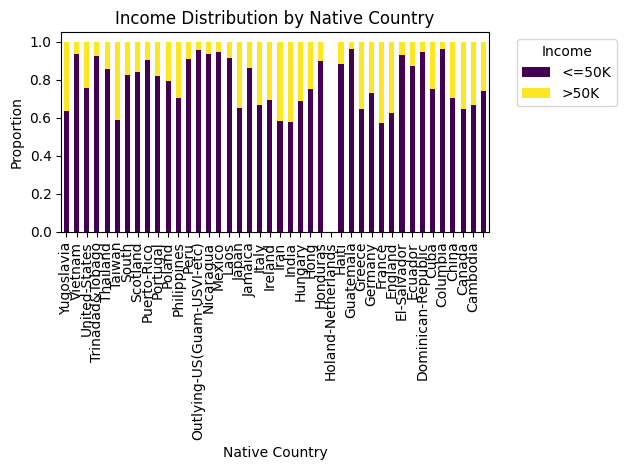

In [103]:
income_distribution = df.groupby('native-country')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(12, 8))
income_distribution.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Native Country')
plt.ylabel('Proportion')
plt.title('Income Distribution by Native Country')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [104]:
# Encode native-country
country_mapping = {
    'United-States': 0,
    'Mexico': 1,
    'Philippines': 2,
    'Germany': 3,
    'Puerto-Rico': 4,
    'Canada': 5,
    'India': 6,
    'El-Salvador': 7,
    'Cuba': 8,
    'England': 9,
    'China': 10,
    'Jamaica': 11,
    'South': 12,
    'Italy': 13,
    'Dominican-Republic': 14,
    'Japan': 15,
    'Guatemala': 16,
    'Vietnam': 17,
    'Columbia': 18,
    'Poland': 19,
    'Haiti': 20,
    'Portugal': 21,
    'Iran': 22,
    'Taiwan': 23,
    'Greece': 24,
    'Nicaragua': 25,
    'Peru': 26,
    'Ecuador': 27,
    'Ireland': 28,
    'France': 29,
    'Thailand': 30,
    'Hong': 31,
    'Cambodia': 32,
    'Trinadad&Tobago': 33,
    'Yugoslavia': 34,
    'Outlying-US(Guam-USVI-etc)': 35,
    'Laos': 36,
    'Scotland': 37,
    'Honduras': 38,
    'Hungary': 39,
    'Holand-Netherlands': 40
}

df['native-country_encoded'] = df['native-country'].map(country_mapping)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


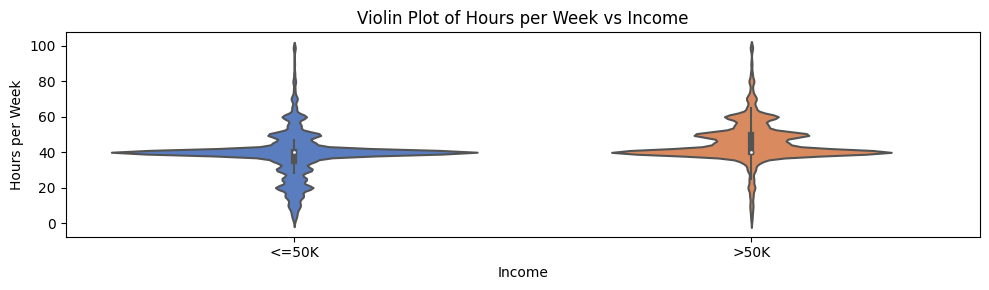

In [105]:
# hours-per-week Vs income
plt.figure(figsize=(10, 3))
sns.violinplot(x='income', y='hours-per-week', data=df, palette='muted')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.title('Violin Plot of Hours per Week vs Income')
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.tight_layout()
plt.show()

In [106]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,native-country,income,age_slab,workclass_encoded,education_encoded,marital_encoded,occupation_encoded,race_encoded,gender_encoded,native-country_encoded
0,25.0,Private,226802.0,11th,NaN,Never-married,Machine-op-inspct,Own-child,Black,Male,...,United-States,<=50K,19-30,2.0,5.0,2,6.0,1,0,0.0
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,United-States,<=50K,30-50,2.0,0.0,1,9.0,0,0,0.0
2,28.0,Local-gov,NaN,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,...,United-States,>50K,19-30,1.0,NaN,1,12.0,0,0,0.0
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,United-States,>50K,30-50,2.0,1.0,1,6.0,1,0,0.0
4,18.0,NaN,103497.0,Some-college,10.0,Never-married,,Own-child,White,Female,...,United-States,<=50K,0-18,NaN,1.0,2,NaN,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,...,United-States,<=50K,19-30,2.0,NaN,1,10.0,0,1,0.0
48838,40.0,Private,154374.0,HS-grad,9.0,NaN,Machine-op-inspct,Husband,White,Male,...,NaN,>50K,30-50,2.0,0.0,NaN,6.0,0,0,NaN
48839,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,...,United-States,<=50K,50-65,2.0,0.0,4,3.0,0,1,0.0
48840,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,...,United-States,<=50K,19-30,2.0,0.0,2,3.0,0,0,0.0


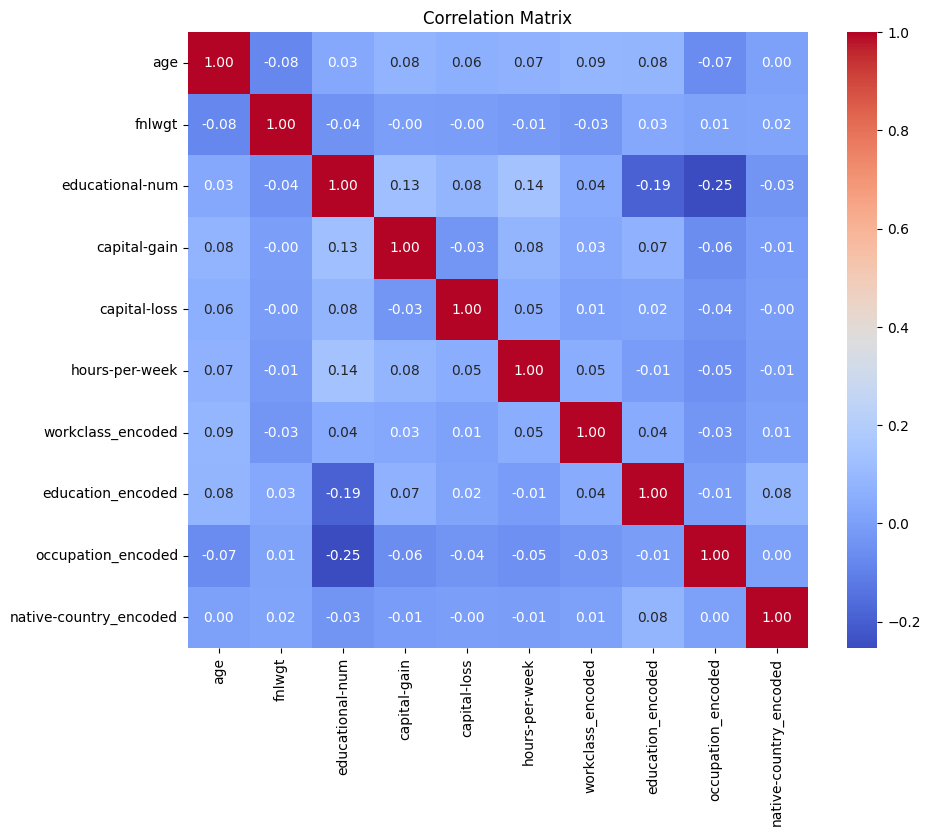

In [107]:
df_new_num=df.select_dtypes(include = ["float64", "int64"])
# Compute the correlation matrix for numerical columns
correlation_matrix = df_new_num.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

coefficient of variation

In [108]:
coefficient_of_variation = df_new_num.std() / df_new_num.mean()
print(coefficient_of_variation*100)

age                        35.274873
fnlwgt                     55.558571
educational-num            25.518523
capital-gain              691.323037
capital-loss              460.321585
hours-per-week             30.668363
workclass_encoded          43.438452
education_encoded         131.051418
occupation_encoded         79.608026
native-country_encoded    457.624190
dtype: float64


<Axes: >

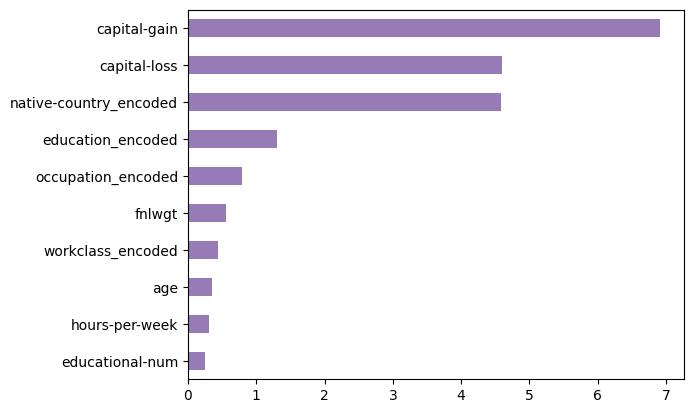

In [109]:
sorted_cv = coefficient_of_variation.sort_values()
sorted_cv.plot.barh(x = 'Variables', y = 'Coefficient of Variation', color = '#967bb6')

In [110]:
from tabulate import tabulate
from scipy.stats import skew, kurtosis, normaltest, shapiro 

skewness = df_new_num.skew()
kurtosisness = df_new_num.kurtosis()

headers = ['Variable', 'Shapiro Test', 'Skewness C.', 'Skewness', 'Kurtosis C.', 'Kurtosis']

table_data = []
for col in df_new_num.columns:
    stat, p = normaltest(df[col])
    skewness_val = f'{skewness[col]:.4f}'
    skewness_desc = 'High skewness' if skewness[col] < -1 or skewness[col] > 1 else 'Symmetric or slightly skewed'
    kurtosis_val = f'{kurtosisness[col]:.4f}'
    kurtosis_desc = 'Very flat or peaked' if kurtosisness[col] < -2 or kurtosisness[col] > 2 else 'Normal or slightly flat'

    stat_sh, p_sh = shapiro(df[col])
    shapiro_test = 'Yes' if p_sh >= 0.05 else 'No'
    
    table_data.append([col, shapiro_test, skewness_val, skewness_desc, kurtosis_val, kurtosis_desc])

table = tabulate(table_data, headers, tablefmt='pretty')
print(table)

+------------------------+--------------+-------------+------------------------------+-------------+-------------------------+
|        Variable        | Shapiro Test | Skewness C. |           Skewness           | Kurtosis C. |        Kurtosis         |
+------------------------+--------------+-------------+------------------------------+-------------+-------------------------+
|          age           |      No      |   0.5135    | Symmetric or slightly skewed |   -0.3640   | Normal or slightly flat |
|         fnlwgt         |      No      |   1.4055    |        High skewness         |   5.6736    |   Very flat or peaked   |
|    educational-num     |      No      |   -0.3177   | Symmetric or slightly skewed |   0.6264    | Normal or slightly flat |
|      capital-gain      |      No      |   11.8961   |        High skewness         |  152.6765   |   Very flat or peaked   |
|      capital-loss      |      No      |   4.5661    |        High skewness         |   19.9689   |   Very fla

/tmp/ipykernel_30/3094803232.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_income = df.groupby(['education', 'income']).size().unstack()


<Figure size 1000x600 with 0 Axes>

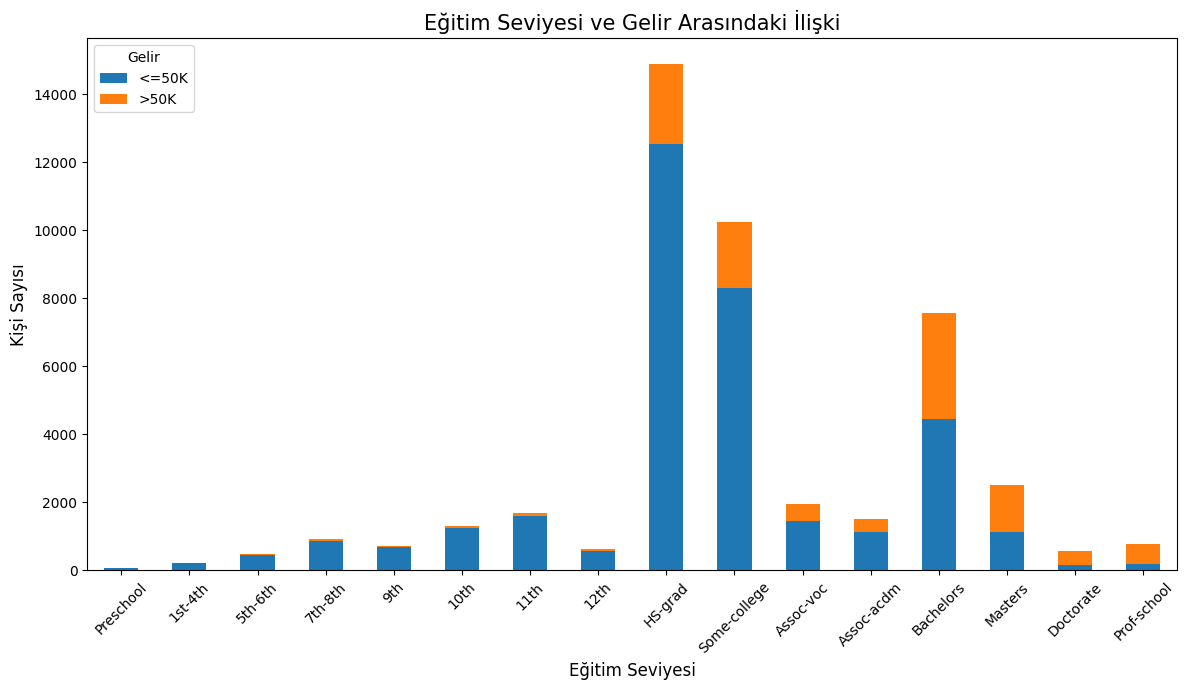

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Eğitim ve gelir verisini içeren DataFrame'inizi kullanarak stacked barplot oluşturun
plt.figure(figsize=(10, 6))

# Stacked barplot
education_income = df.groupby(['education', 'income']).size().unstack()
education_income = education_income.fillna(0)

education_income.plot(kind='bar', stacked=True, figsize=(12, 7))

plt.title('Eğitim Seviyesi ve Gelir Arasındaki İlişki', fontsize=15)
plt.xlabel('Eğitim Seviyesi', fontsize=12)
plt.ylabel('Kişi Sayısı', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gelir', labels=['<=50K', '>50K'], loc='upper left')
plt.tight_layout()

plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


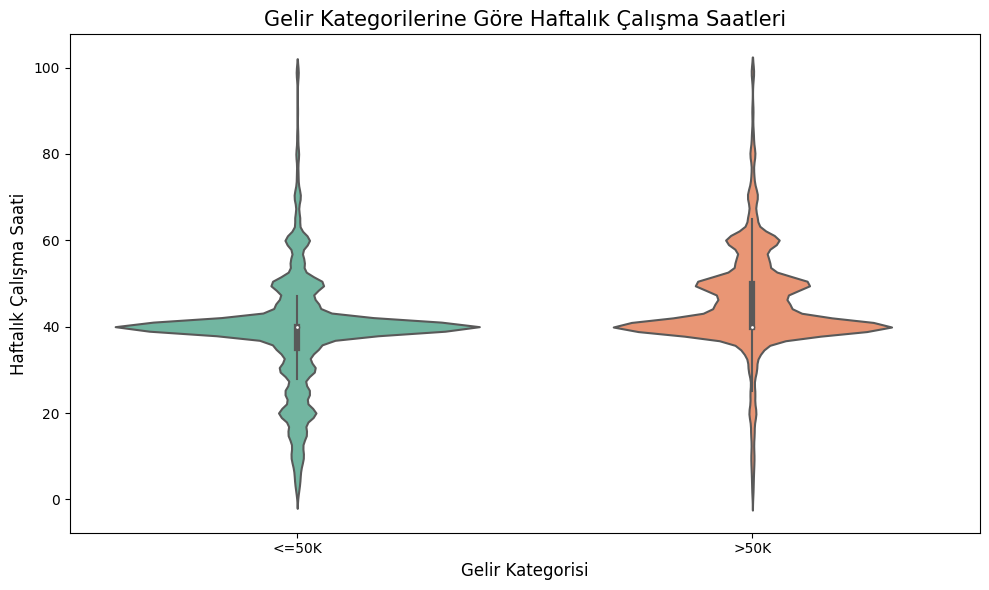

In [112]:
plt.figure(figsize=(10, 6))

# Violin plot: Gelir kategorisine göre haftalık çalışma saatlerini inceleyin
sns.violinplot(data=df, x='income', y='hours-per-week', palette='Set2')

plt.title('Gelir Kategorilerine Göre Haftalık Çalışma Saatleri', fontsize=15)
plt.xlabel('Gelir Kategorisi', fontsize=12)
plt.ylabel('Haftalık Çalışma Saati', fontsize=12)
plt.tight_layout()

plt.show()


# 7) Model Creation and Model Results

Model: Logistic Regression
Accuracy: 0.8569
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.74      0.61      0.66      2290

    accuracy                           0.86      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769

----------------------------------------


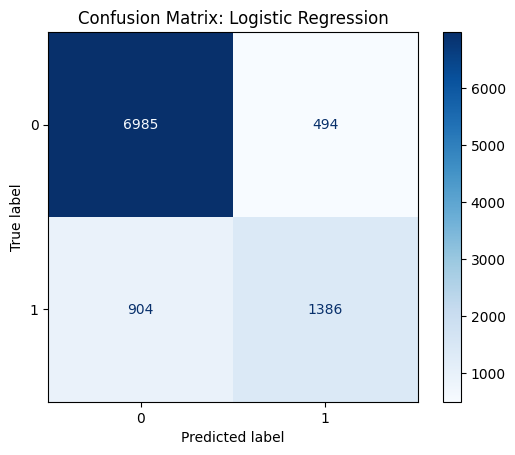

Model: Decision Tree
Accuracy: 0.8181
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7479
           1       0.61      0.64      0.62      2290

    accuracy                           0.82      9769
   macro avg       0.75      0.76      0.75      9769
weighted avg       0.82      0.82      0.82      9769

----------------------------------------


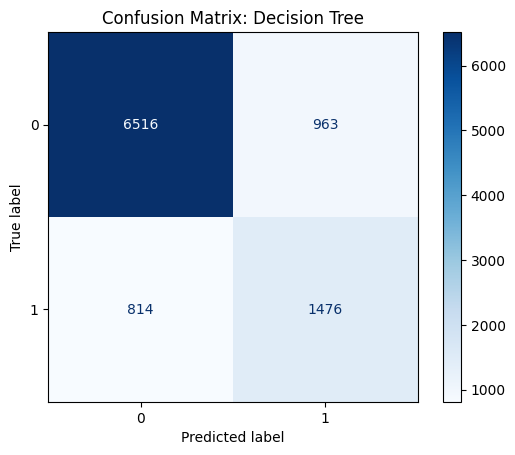

Model: Random Forest
Accuracy: 0.8601
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.73      0.64      0.68      2290

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769

----------------------------------------


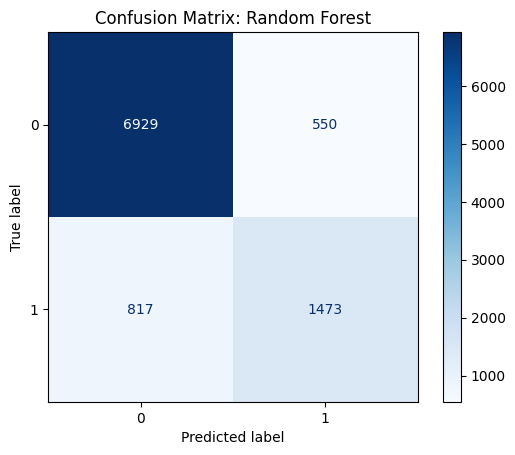

Model: Gradient Boosting
Accuracy: 0.8741
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7479
           1       0.79      0.62      0.70      2290

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769

----------------------------------------


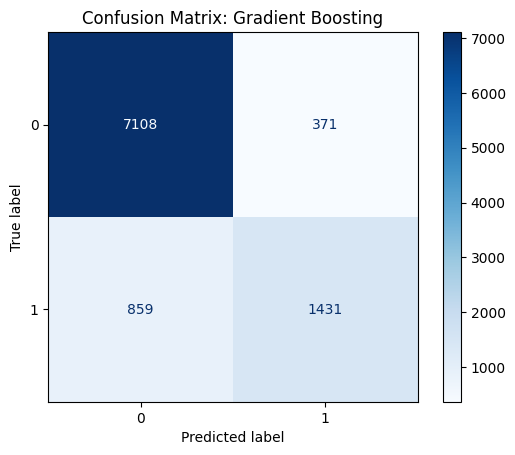

Model: XGBoost
Accuracy: 0.8775
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7479
           1       0.77      0.68      0.72      2290

    accuracy                           0.88      9769
   macro avg       0.84      0.81      0.82      9769
weighted avg       0.87      0.88      0.87      9769

----------------------------------------


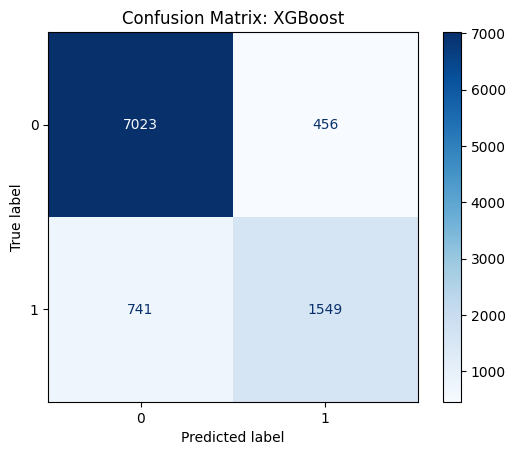

Model: Support Vector Machine
Accuracy: 0.8629
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7479
           1       0.77      0.60      0.67      2290

    accuracy                           0.86      9769
   macro avg       0.83      0.77      0.79      9769
weighted avg       0.86      0.86      0.86      9769

----------------------------------------


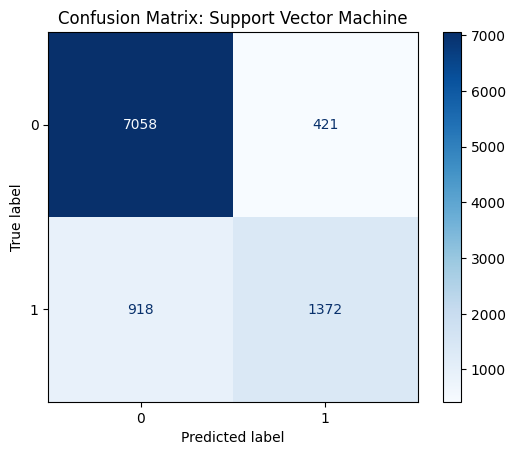


Summary of Model Performance:
Logistic Regression: 0.8569
Decision Tree: 0.8181
Random Forest: 0.8601
Gradient Boosting: 0.8741
XGBoost: 0.8775
Support Vector Machine: 0.8629


In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay


df = pd.read_csv('/kaggle/input/adult-income-dataset/adult.csv')


# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(r'\s+', '_', regex=True)

# Handle missing values
df.dropna(inplace=True)

# Encode target variable as numeric
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Define features (X) and target (y)
X = df.drop('income', axis=1)  # Replace 'income' with your target column
y = df['income']  # Replace 'income' with your target column

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# List of models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Support Vector Machine": SVC()
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    # Create a pipeline for each model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 40)

# Generate and display confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

# Print summary of model performance
print("\nSummary of Model Performance:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")


* # CONCLUSION
* after all of these hard work we have learned from the data:
* this dataset can be used to predict if a person earning <50k or not
* working hours mostly 40 hours that doesnt affect much
* after the age of 65+ your income is significantly dropping
* 30-50 and 50-65 earns the most as age
* if you are male you are earning more
* if you are asian you earn more >50k
* managers and profs are earning more than the other occupations
* as marital stats married person earns more
* as educational level doctorate and prof schools earns more
* if your working class is self employed inc you are earning more than others
* so if you are male,asian,married,50 year old ,self emplyed prof you are earning the best money for this dataset!!!
* for the machine learning model gradient boosting and xgboost works fine for this dataset.
  